In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import wkt



In [3]:
df_coles = pd.read_csv('data/data_aprobados_colegio_barrio_2022.csv', sep=';', encoding='latin1')

df_coles_bcn = df_coles[df_coles['Municipi']=='BARCELONA']

df_coles_bcn

,Curs,Estudi,Codi àrea territorial,Àrea territorial,Codi comarca,Comarca,Codi municipi,Municipi,Codi districte,Naturalesa,Titularitat,Nivell,Sexe,Concert,Resultat de l'avaluació,Alumnes avaluats
0,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,DONA,SI,PROMOCIONEN SENSE PENDENTS,17
1,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN AMB PENDENTS,5
2,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN SENSE PENDENTS,38
3,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,2,DONA,SI,NO PROMOCIONEN,1
4,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,2,DONA,SI,PROMOCIONEN AMB PENDENTS,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801910,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,DONA,NaN,PROMOCIONEN AMB PENDENTS,143
1183,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801910,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,DONA,NaN,PROMOCIONEN SENSE PENDENTS,350
1184,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801910,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,HOME,NaN,NO PROMOCIONEN,88
1185,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801910,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,HOME,NaN,PROMOCIONEN AMB PENDENTS,167


In [4]:
df_coles_bcn_publicos = df_coles_bcn[df_coles_bcn['Naturalesa']=='PÚBLIC']
df_coles_bcn_privats = df_coles_bcn[df_coles_bcn['Naturalesa']=='PRIVAT']

df_promocionan_publics = df_coles_bcn_publicos[df_coles_bcn_publicos['Resultat de l\'avaluació']=='PROMOCIONEN SENSE PENDENTS']
df_pendientes_publics = df_coles_bcn_publicos[df_coles_bcn_publicos['Resultat de l\'avaluació']=='PROMOCIONEN AMB PENDENTS']
df_nop_publics = df_coles_bcn_publicos[df_coles_bcn_publicos['Resultat de l\'avaluació']=='NO PROMOCIONEN']

df_promocionan_privats = df_coles_bcn_privats[df_coles_bcn_privats['Resultat de l\'avaluació']=='PROMOCIONEN SENSE PENDENTS']
df_pendientes_privats = df_coles_bcn_privats[df_coles_bcn_privats['Resultat de l\'avaluació']=='PROMOCIONEN AMB PENDENTS']
df_nop_privats = df_coles_bcn_privats[df_coles_bcn_privats['Resultat de l\'avaluació']=='NO PROMOCIONEN']

count_promo_publics = df_promocionan_publics['Alumnes avaluats'].sum()
count_promo_privats = df_promocionan_privats['Alumnes avaluats'].sum()

count_pendents_publics = df_pendientes_publics['Alumnes avaluats'].sum()
count_pendents_privats = df_pendientes_privats['Alumnes avaluats'].sum()

count_nop_publics = df_nop_publics['Alumnes avaluats'].sum()
count_nop_privats = df_nop_privats['Alumnes avaluats'].sum()


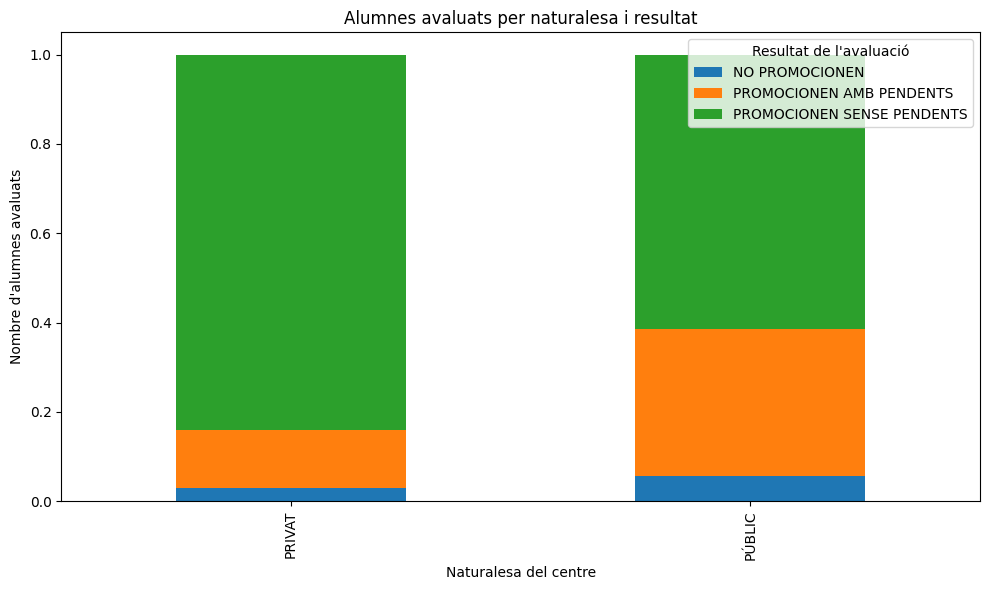

In [5]:
df_grafico = df_coles_bcn[['Naturalesa','Resultat de l\'avaluació','Alumnes avaluats']]

df_grouped = df_grafico.groupby(['Naturalesa', "Resultat de l'avaluació"])['Alumnes avaluats'].sum().unstack()

df_frac = df_grouped.div(df_grouped.sum(axis=1),axis=0)

df_frac.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title("Alumnes avaluats per naturalesa i resultat")
plt.xlabel("Naturalesa del centre")
plt.ylabel("Nombre d'alumnes avaluats")
plt.legend(title="Resultat de l'avaluació")
plt.tight_layout()
plt.show()


In [6]:

df_renta_2022 = pd.read_csv('data/2022_renda_disponible_llars_per_persona.csv')

df_renta_media_barrio2022 = df_renta_2022.groupby('Nom_Barri')['Import_Euros'].mean().reset_index()



   codi_districte nom_districte  codi_barri  \
0               1  Ciutat Vella           1   
1               1  Ciutat Vella           2   
2               1  Ciutat Vella           3   
3               1  Ciutat Vella           4   
4               2      Eixample           5   

                               nom_barri  \
0                               el Raval   
1                         el Barri Gòtic   
2                         la Barceloneta   
3  Sant Pere, Santa Caterina i la Ribera   
4                          el Fort Pienc   

                                    geometria_etrs89  \
0  POLYGON ((430162.1875 4581936.9845, 430102.838...   
1  POLYGON ((431189.9075 4581851.4475, 431025.789...   
2  POLYGON ((432798.7341255 4582081.2599495, 4327...   
3  POLYGON ((431733.736 4582441.816, 431557.5115 ...   
4  POLYGON ((431741.8152 4582625.6491, 432012.183...   

                                     geometria_wgs84  \
0  POLYGON ((2.16471378585589 41.3859301967194, 2...   
1  

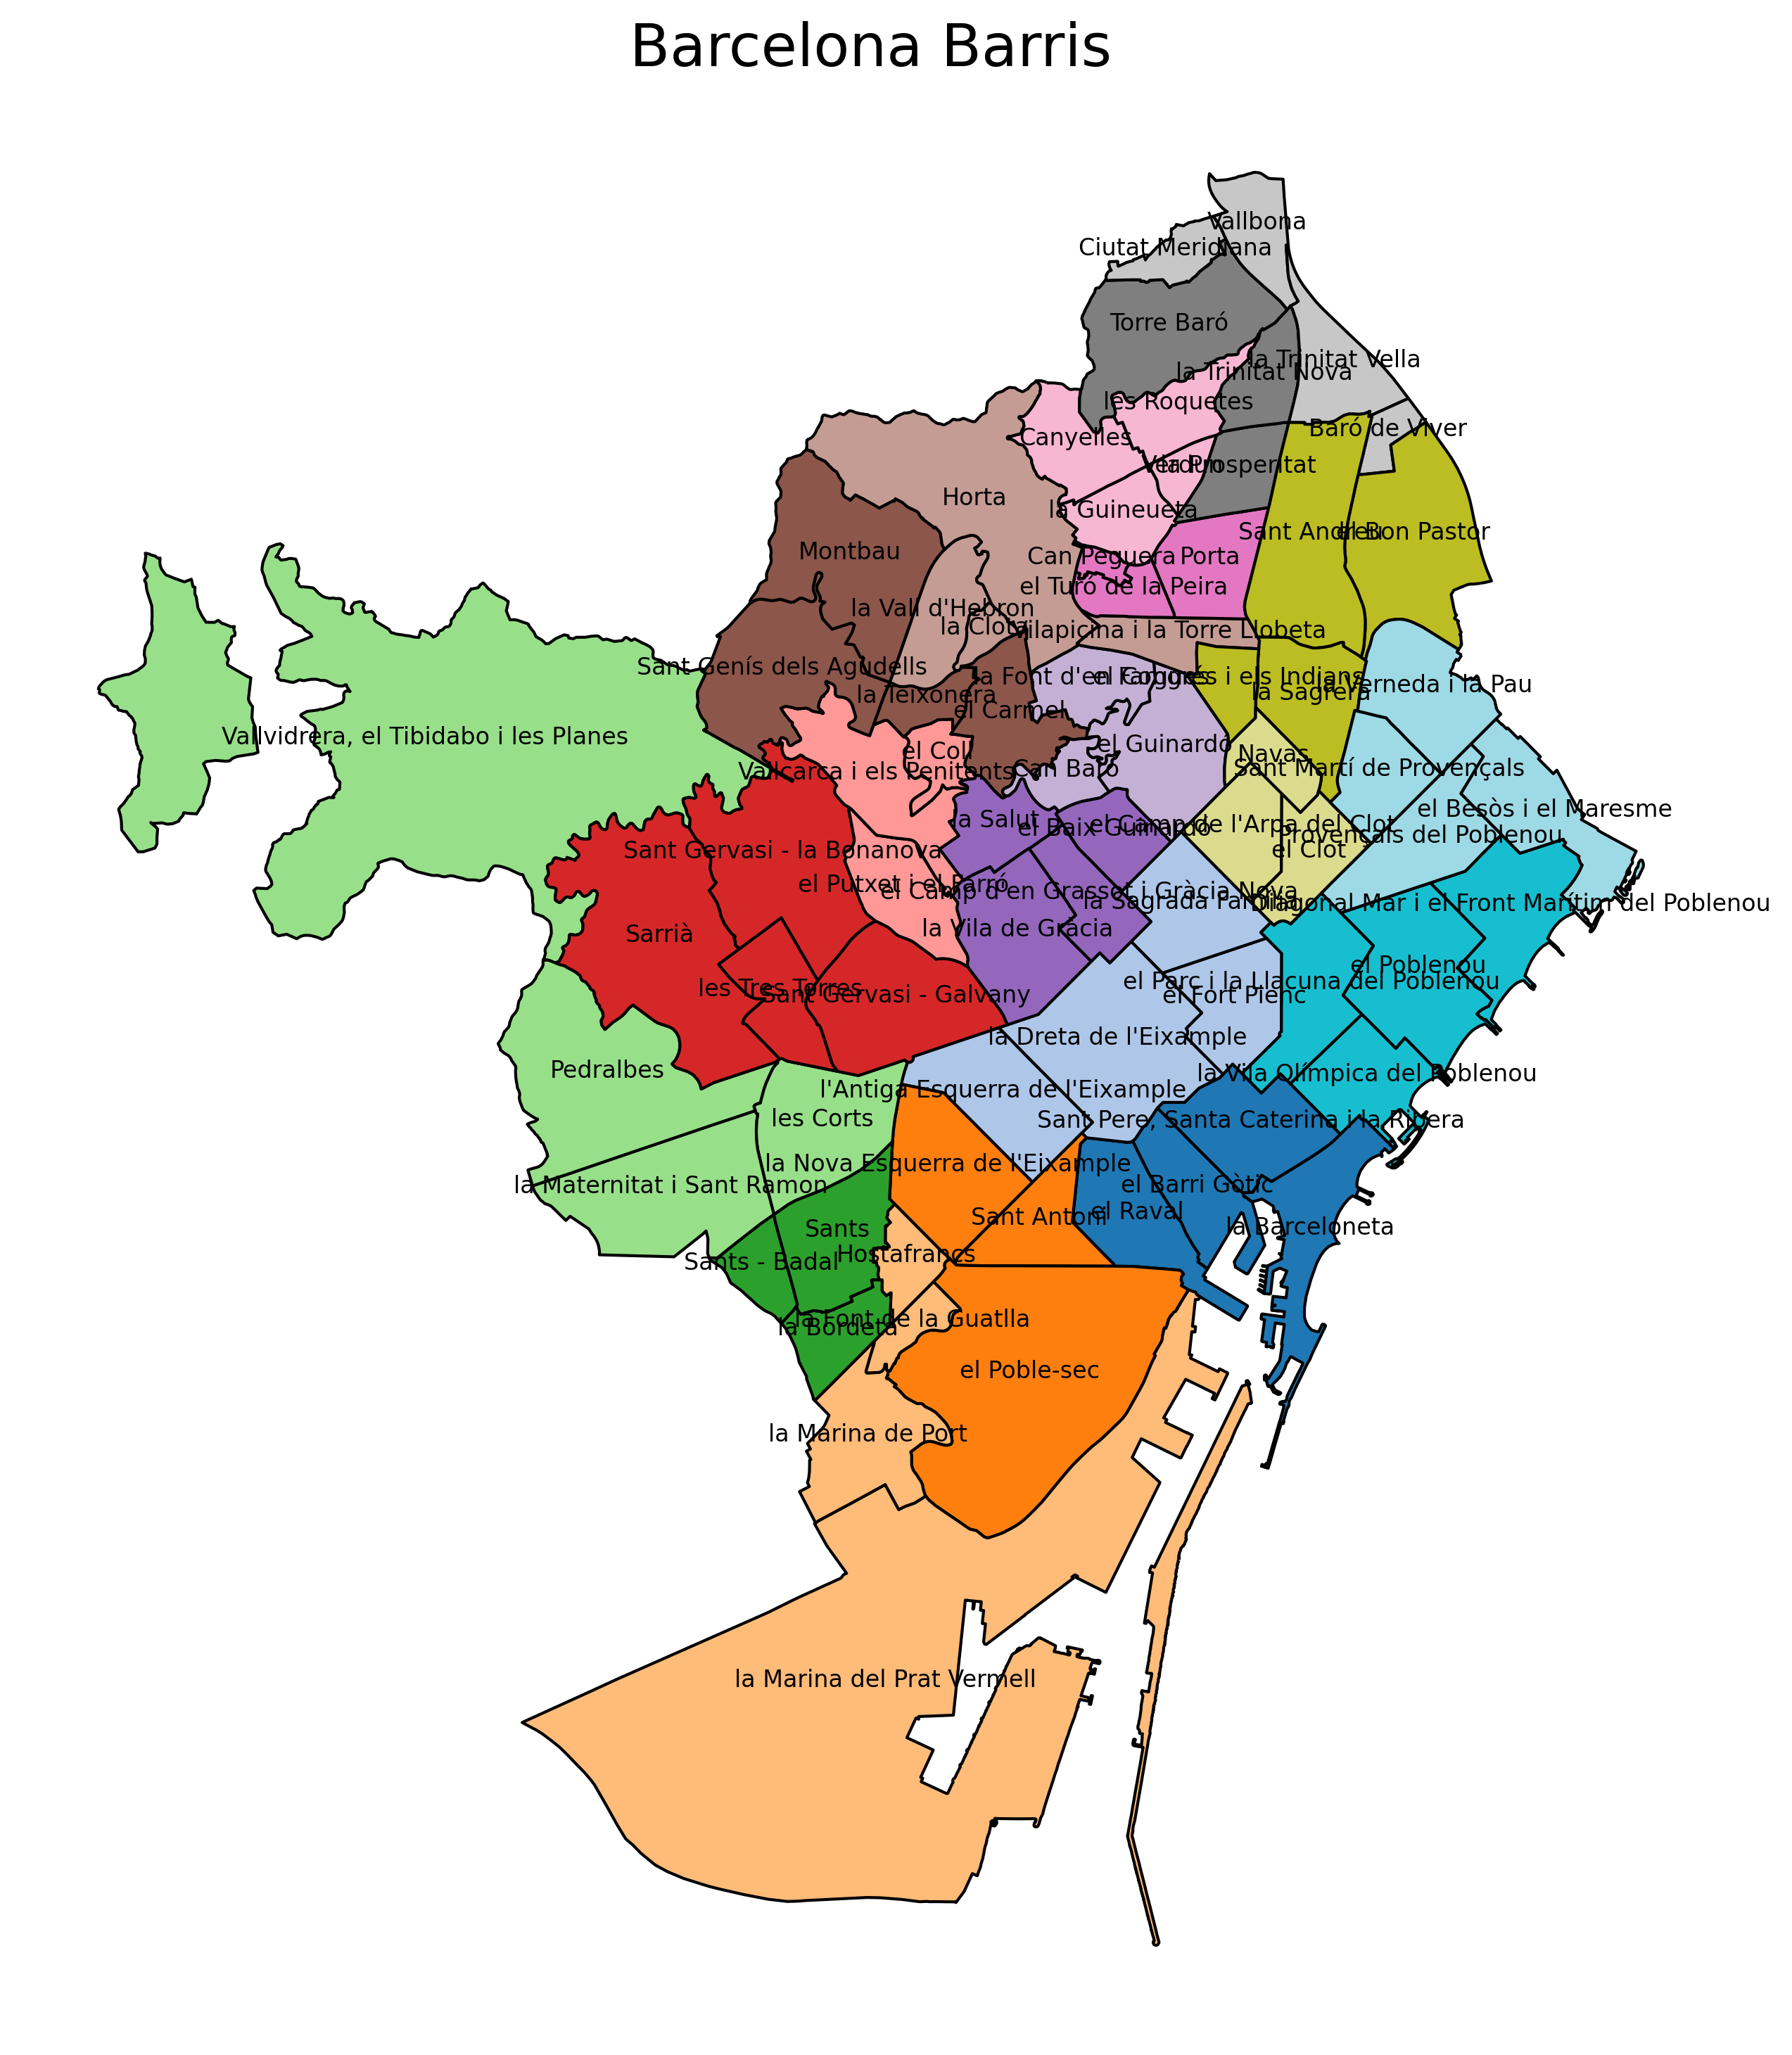

In [7]:
df_barris = pd.read_csv("data/BarcelonaCiutat_Barris.csv")

df_barris['geometry'] = df_barris['geometria_etrs89'].apply(wkt.loads)

barris = gpd.GeoDataFrame(df_barris, geometry='geometry')
barris.set_crs(epsg=25831, inplace=True) #assings a coordinate reference system. 25831 is the one commonly used for bcn
barris = barris.to_crs(epsg=4326)
"""
set_crs() Label your coordinates with the correct system
to_crs() Convert your coordinates into a new system
"""
print(barris.head())
print(barris.columns)
print(barris.crs)

fig, ax = plt.subplots(figsize=(12,12), dpi=300)
for idx, row in barris.iterrows():
    plt.annotate(
        text=row['nom_barri'],  # replace with your column
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        horizontalalignment='center',
        fontsize=8,
        color='black'
    )
barris.plot(ax=ax, edgecolor='black', cmap='tab20')
plt.title("Barcelona Barris", fontsize=20)
plt.axis('off')
plt.show()

barris.to_file("barcelona_barris_clean.geojson", driver="GeoJSON")
barris.to_file("data/barcelona_barris_clean.geojson", driver="GeoJSON")


In [8]:
gdf_barris = gpd.read_file('barcelona_barris_clean.geojson')

gdf_barris.columns
df_renta_media_barrio2022.columns

#print(df_renta_media_barrio2022['Nom_Barri'].unique())
#print(gdf_barris['nom_barri'].unique())

df_renta_media_barrio2022["Nom_Barri"] = df_renta_media_barrio2022["Nom_Barri"].str.replace("el Poble Sec - AEI Parc Montjuïc", "el Poble-sec")
df_renta_media_barrio2022["Nom_Barri"] = df_renta_media_barrio2022["Nom_Barri"].str.replace(" - AEI Zona Franca", "", regex=False)


In [9]:
gdf_renta_barrios = gdf_barris.merge(df_renta_media_barrio2022,
                       left_on="nom_barri",
                       right_on="Nom_Barri")



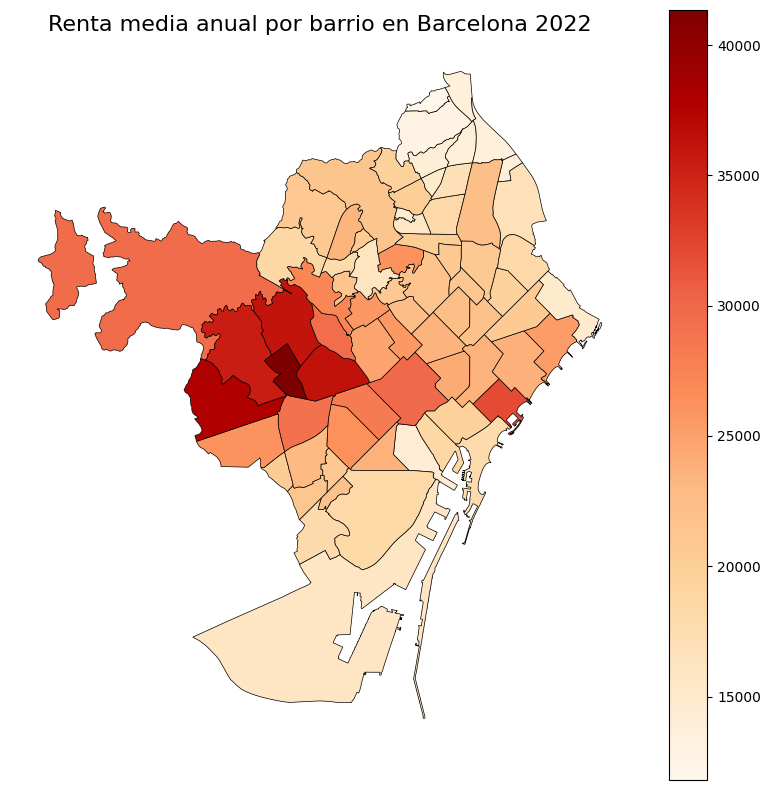

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

gdf_renta_barrios.plot(column="Import_Euros",
         cmap="OrRd",
         linewidth=0.5,
         edgecolor="black",
         legend=True,
         ax=ax)

ax.set_title("Renta media anual por barrio en Barcelona 2022", fontsize=16)
ax.axis("off")

plt.show()

In [11]:
#excel_path = "/Users/donquintin/Desktop/truco-o-dato/data_Quintin/rawdata/estadistica-itineraris-educatius.#xlsx"
#xls = pd.ExcelFile(excel_path)

#for sheet in xls.sheet_names:
    #df = pd.read_excel(excel_path, sheet_name=sheet)
    #df.to_csv(f"{sheet}.csv", index=False)
    #print(f"Guardado: {sheet}.csv")

In [17]:
df_formacion_CAT = pd.read_csv('data_Quintin/CAT_NivelEducativo_15anhos.csv')

df_education_abs_1718 = pd.read_csv('/Users/donquintin/Desktop/truco-o-dato/data_Quintin/NumerosAbsolutosTrayectoria/Abs1718_origen_desti_CAT.csv')

df_education_abs_1718

,origen 2016-2017,Unnamed: 1,Alumnes,3r ESO,4t ESO,1r BATX,2n BATX,1r CFPM,2n CFPM,1r CFPS,2n CFPS,1r CFAM,2n CFAM,1r CFAS,2n CFAS
0,3r ESO,75592,70434,4106,66328,0,0,0,0,0,0,0,0,0,0
1,4t ESO,69936,61374,0,3258,43105,0,14659,0,0,0,352,0,0,0
2,1r BATX,49225,46127,0,0,3818,38437,3541,111,86,0,124,4,6,0
3,2n BATX,42058,11788,0,0,15,4165,369,32,6762,14,10,1,420,0
4,1r CFPM,35161,25331,0,0,261,66,7381,15964,1558,68,27,0,6,0
5,2n CFPM,23749,14097,0,0,70,20,878,7274,5689,140,10,0,15,1
6,1r CFPS,30322,25376,0,0,7,7,110,41,2484,22712,0,1,12,2
7,2n CFPS,28622,8181,0,0,4,6,101,27,1026,6983,0,0,33,1
8,1r CFAM,705,592,0,0,7,1,12,0,3,0,97,465,6,1
9,2n CFAM,550,339,0,0,1,0,4,3,12,0,3,118,184,14


In [19]:
df_education_1718_4t = df_education_abs_1718[df_education_abs_1718['origen 2016-2017']=='4t ESO']

df_education_1718_4t

,origen 2016-2017,Unnamed: 1,Alumnes,3r ESO,4t ESO,1r BATX,2n BATX,1r CFPM,2n CFPM,1r CFPS,2n CFPS,1r CFAM,2n CFAM,1r CFAS,2n CFAS
1,4t ESO,69936,61374,0,3258,43105,0,14659,0,0,0,352,0,0,0


In [20]:
df_ed1718_pc = pd.read_csv('/Users/donquintin/Desktop/truco-o-dato/data_Quintin/PorcentajesDeTrayectoria/distribucion1718_origen_desti_CAT.csv')
df_ed1718_pc

,origen 2016-2017,Unnamed: 1,Distribució total,3r ESO,4t ESO,1r BATX,2n BATX,1r CFPM,2n CFPM,1r CFPS,2n CFPS,1r CFAM,2n CFAM,1r CFAS,2n CFAS
0,3r ESO,100,93.176527,5.431792,87.744735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4t ESO,100,87.757378,0.000000,4.658545,61.634923,0.000000,20.960593,0.000000,0.000000,0.000000,0.503317,0.000000,0.000000,0.000000
2,1r BATX,100,93.706450,0.000000,0.000000,7.756221,78.084307,7.193499,0.225495,0.174708,0.000000,0.251905,0.008126,0.012189,0.000000
3,2n BATX,100,28.027961,0.000000,0.000000,0.035665,9.902991,0.877360,0.076085,16.077797,0.033287,0.023777,0.002378,0.998621,0.000000
4,1r CFPM,100,72.042888,0.000000,0.000000,0.742300,0.187708,20.992008,45.402577,4.431046,0.193396,0.076790,0.000000,0.017064,0.000000
5,2n CFPM,100,59.358289,0.000000,0.000000,0.294749,0.084214,3.696998,30.628658,23.954693,0.589499,0.042107,0.000000,0.063161,0.004211
6,1r CFPS,100,83.688411,0.000000,0.000000,0.023086,0.023086,0.362773,0.135215,8.192072,74.902711,0.000000,0.003298,0.039575,0.006596
7,2n CFPS,100,28.582908,0.000000,0.000000,0.013975,0.020963,0.352875,0.094333,3.584655,24.397317,0.000000,0.000000,0.115296,0.003494
8,1r CFAM,100,83.971631,0.000000,0.000000,0.992908,0.141844,1.702128,0.000000,0.425532,0.000000,13.758865,65.957447,0.851064,0.141844
9,2n CFAM,100,61.636364,0.000000,0.000000,0.181818,0.000000,0.727273,0.545455,2.181818,0.000000,0.545455,21.454545,33.454545,2.545455
